Importing Dataset

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data Preprocessing

Trainng Image preprocssion

In [37]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dashboard_indicators/Treaning',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode='rgb',
    batch_size =32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 509 files belonging to 29 classes.


Validation Image Preprocessing

In [38]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dashboard_indicators/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 29 files belonging to 29 classes.


Buiding model

In [39]:
cnn = tf.keras.models.Sequential()

Building convolution layer

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(tf.keras.layers.Flatten())

In [43]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [44]:
cnn.add(tf.keras.layers.Dropout(0.5)) #Droping neuron to avoid oerfitting

In [45]:
#output Layer
cnn.add(tf.keras.layers.Dense(units=29,activation='softmax'))

Compiling and training phase

In [46]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [49]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=33)

Epoch 1/33
16/16 [==============================] - 9s 485ms/step - loss: 2.9975 - accuracy: 0.2141 - val_loss: 2.5975 - val_accuracy: 0.3793
Epoch 2/33
16/16 [==============================] - 10s 526ms/step - loss: 1.9220 - accuracy: 0.4597 - val_loss: 1.4897 - val_accuracy: 0.6207
Epoch 3/33
16/16 [==============================] - 10s 581ms/step - loss: 1.1264 - accuracy: 0.6974 - val_loss: 1.0917 - val_accuracy: 0.7241
Epoch 4/33
16/16 [==============================] - 9s 510ms/step - loss: 0.6775 - accuracy: 0.8094 - val_loss: 1.1035 - val_accuracy: 0.7931
Epoch 5/33
16/16 [==============================] - 9s 470ms/step - loss: 0.5011 - accuracy: 0.8703 - val_loss: 0.7762 - val_accuracy: 0.8276
Epoch 6/33
16/16 [==============================] - 10s 588ms/step - loss: 0.3879 - accuracy: 0.8919 - val_loss: 0.4934 - val_accuracy: 0.8276
Epoch 7/33
16/16 [==============================] - 10s 562ms/step - loss: 0.2559 - accuracy: 0.9293 - val_loss: 0.5413 - val_accuracy: 0.8276
Ep

saving model

In [51]:
cnn.save('trained_model.h5')

In [52]:
training_history.history

{'loss': [2.9974708557128906,
  1.9219796657562256,
  1.126432180404663,
  0.6774598360061646,
  0.5011022686958313,
  0.38792896270751953,
  0.2558591365814209,
  0.24717947840690613,
  0.18921686708927155,
  0.0820954293012619,
  0.10978806763887405,
  0.08547276258468628,
  0.08609170466661453,
  0.07009636610746384,
  0.08878859877586365,
  0.06769762188196182,
  0.0918714851140976,
  0.06776583194732666,
  0.027979960665106773,
  0.03218185901641846,
  0.027839133515954018,
  0.030068956315517426,
  0.032662902027368546,
  0.03649495169520378,
  0.027773352339863777,
  0.04829072952270508,
  0.07852629572153091,
  0.037417370826005936,
  0.022292228415608406,
  0.024362988770008087,
  0.044382210820913315,
  0.028515810146927834,
  0.06601986289024353],
 'accuracy': [0.21414537727832794,
  0.45972496271133423,
  0.6974459886550903,
  0.8094302415847778,
  0.8703339695930481,
  0.8919450044631958,
  0.9292730689048767,
  0.9312376976013184,
  0.9528487324714661,
  0.970530450344085

In [53]:
#recoding history
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [54]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating accuracy of model achived on validation set

In [55]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 82.75862336158752 %


Accuracy Visualization

Training visualization

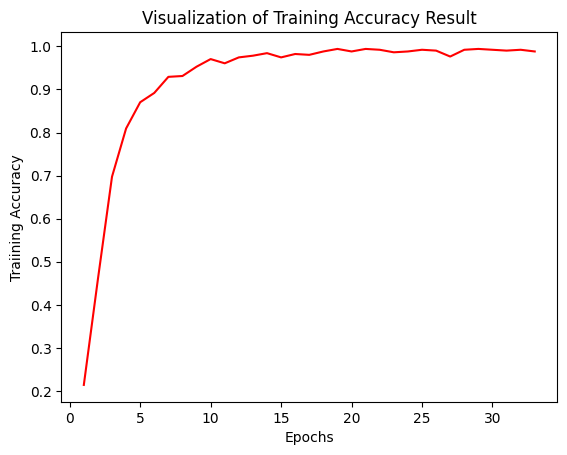

In [57]:
epochs = [i for i in range(1,34)]
plt.plot(epochs,training_history.history['accuracy'], color='red')
plt.xlabel('Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation accuracy

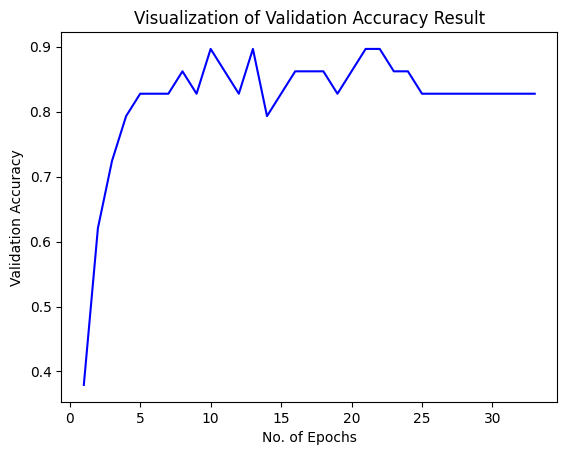

In [58]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [59]:
training_loss,traning_accuracy = cnn.evaluate(training_set)

16/16 [==============================] - 3s 133ms/step - loss: 5.8836e-04 - accuracy: 1.0000


In [60]:
traning_accuracy

1.0

In [61]:
val_loss,val_accuracy,=cnn.evaluate(validation_set)

1/1 [==============================] - 0s 220ms/step - loss: 0.9944 - accuracy: 0.8276


In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dashboard_indicators/Testing',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode='rgb',
    batch_size =32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 55 files belonging to 29 classes.


In [64]:
test_loss,test_accuracy = cnn.evaluate(test_set)

2/2 [==============================] - 6s 82ms/step - loss: 7.0198e-06 - accuracy: 1.0000


In [65]:
test_accuracy

1.0